Stats
              Size      Package         Core          GPU    DRAM  \
count  6300.000000  6300.000000  6300.000000  6300.000000  6300.0   
mean    370.000000     7.636207     7.348292     0.001601     0.0   
std     447.025412    26.606437    25.697140     0.018956     0.0   
min      10.000000     0.006470     0.003296     0.000000     0.0   
25%      10.000000     0.015137     0.006836     0.000000     0.0   
50%     100.000000     0.156280     0.121948     0.000000     0.0   
75%    1000.000000     0.535675     0.481201     0.000000     0.0   
max    1000.000000   118.942688   114.610291     1.370117     0.0   

               Time  Temperature         Memory  
count  6.300000e+03  6300.000000    6300.000000  
mean   2.220768e+05    34.084540   35006.191111  
std    6.813903e+05     4.332297   70449.728404  
min    1.047000e+03    31.700000    1260.000000  
25%    7.000000e+03    32.300000    3400.000000  
50%    3.533950e+04    32.300000   14416.000000  
75%    5.505425e+04   

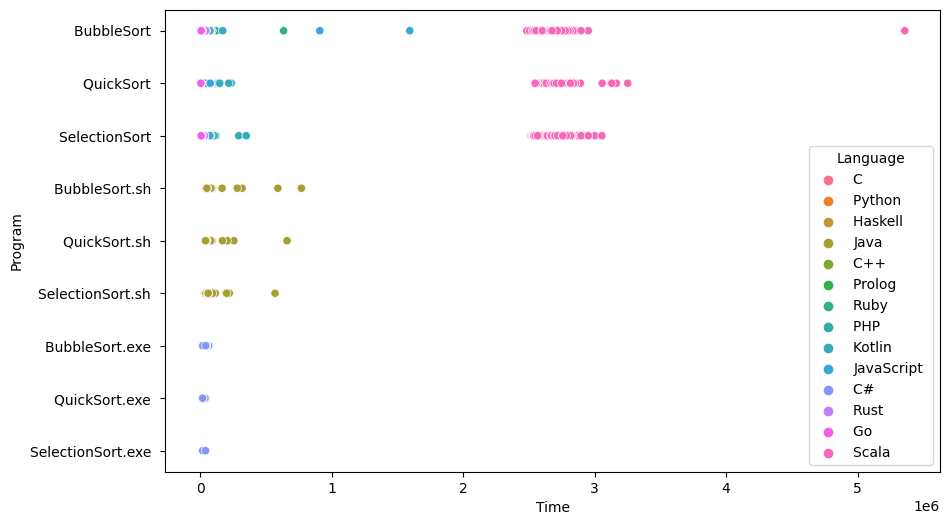

In [13]:
# estatísticas básicas
import seaborn as sea
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


file_name = '../measurements.csv'
df = pd.read_csv(file_name, header = 0, delimiter=",", decimal=".")
plt.figure(figsize=(10,6))
sea.scatterplot(data=df,hue='Language',y='Program', x='Time')

# estatísticas básicas (descritivas)
# summary stats
print("Stats")
print(df[['Language', 'Program' , 'Size' , 'Package' , 'Core' , 'GPU' , 'DRAM' , 'Time', "Temperature", "Memory"]].describe())
print()
print(df.groupby("Program")[["Core","Language"]].describe())

/home/simao/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


[0. 0. 0. 0.]


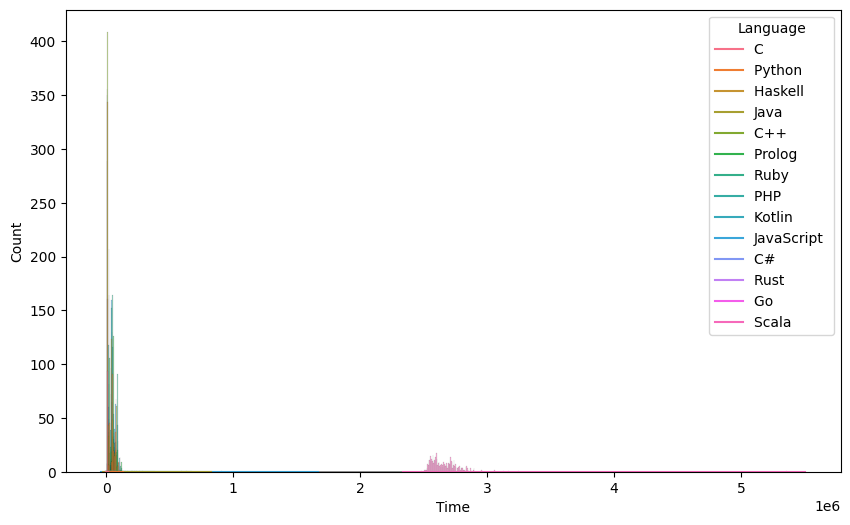

In [14]:
# Histogram and density estimation
from sklearn.neighbors import KernelDensity
import numpy as py

plt.figure(figsize=(10,6))
sea.histplot(data=df, hue='Language', x='Time')
# kernel density estimation for distr
sea.kdeplot(data=df, hue='Language', x='Time')

kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(df[['Core', 'Time']])
# exemplo de uma amostra de novos casos para estimar prob
novos = py.array([[0.15, 3.0], [1.222, 0.3], [1.004, 0.5], [0.10, 2.51]])

# log-likelihood (probability) density dos novos casos
log_dens = kde.score_samples(novos) 
print(py.exp(log_dens))

PearsonRResult(statistic=0.9999958244986841, pvalue=0.0)
ro=0.9930151929958765  p=0.0
tau=0.9396209018111239  p=0.0


Text(0, 0.5, 'Core')

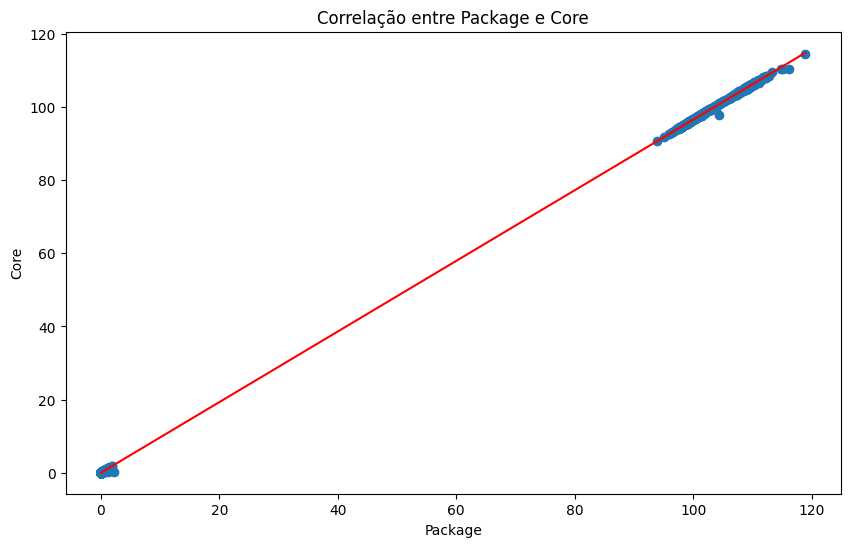

In [15]:
#  Pearson Corr Coef

p = stats.pearsonr(df['Package'], df['Core'])
"""Aqui pvalue é usado no sentido da prob de encontrar
 este resultado se de facto PearsonCorr fosse = 0.
 Se pvalue < 0.05 então a correlation é significativa
 """
print(p)

ro, pvalue1 = stats.spearmanr(df['Package'], df['Core'])
tau, pvalue2 = stats.kendalltau(df['Package'], df['Core'])
print("ro="+str(ro)  +"  p="+ str(pvalue1))
print("tau="+str(tau)+"  p="+str(pvalue2))

plt.figure(figsize=(10,6))
plt.title('Correlação entre Package e Core')
 
# plot the data
plt.scatter(df.Package, df["Core"])
 
# fits the best fitting line to the data
plt.plot(py.unique(df.Package),
         py.poly1d(py.polyfit(df.Package, df["Core"], 1))
         (py.unique(df.Package)), color='red')
 
# Labelling axes
plt.xlabel('Package')
plt.ylabel('Core')


<Axes: xlabel='Package', ylabel='Program'>

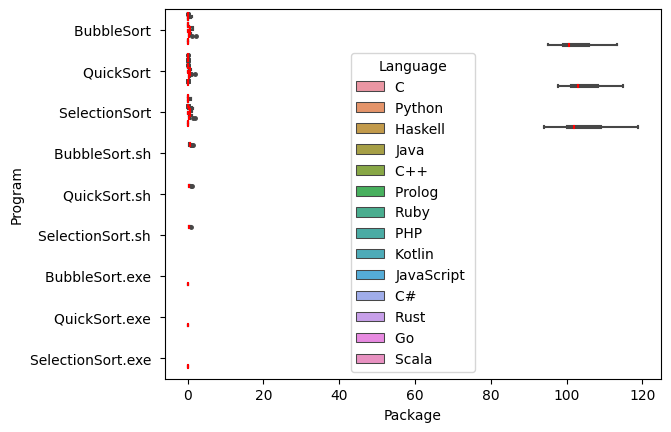

In [16]:
sea.boxplot(data=df,hue='Language',x='Package',y='Program',medianprops={"color":"red"},
            flierprops={"marker": "."},)

Outliers e afins

number of outliers: 0 of 0 observations.
number of outliers: 0 of 0 observations.
number of outliers: 0 of 0 observations.
0


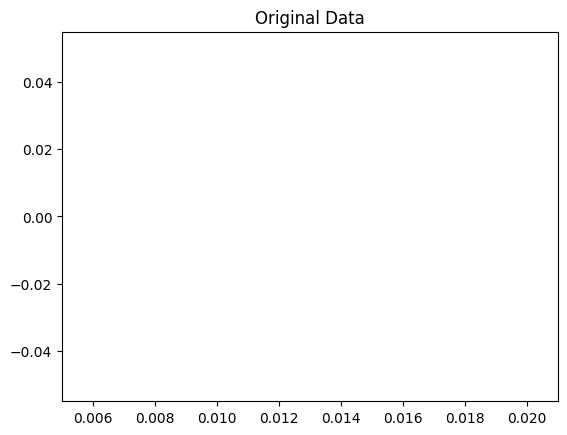

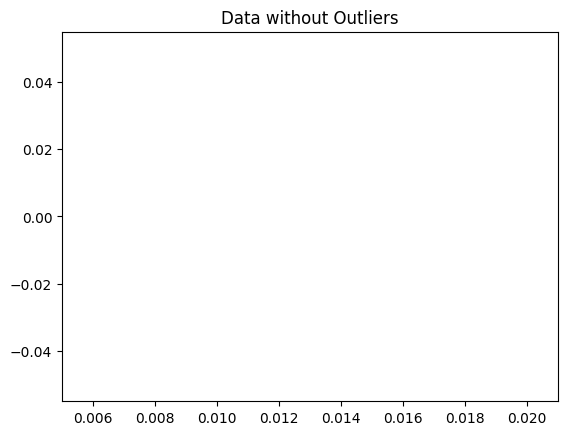

In [17]:
# remoção de outliers via as ideias incluidas nos boxplot
# IQR - Inter Quartil Range como expresso os gráficos acima

# Como a distribuição é desconhecida vamos usar o IQR.
# Com Gaussianas podiamos usar outras estrategias. Mas há vários métodos...
import seaborn as sns
#TODO: rever a partir daqui (incluindo este bloco)
def remove_outliers_quantile(data_series):
    data = data_series
    q75, q25 = data.quantile(q=0.75),data.quantile(q=0.25) # np.percentile(data.loc[:,data_column],[75,25])
    intr_qr = q75 - q25

    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    count_total = len(data)

    data = data[(data > min) & (data < max)]
    count_wo_outliers = len(data)

    outliers_count = count_total - count_wo_outliers
    print(f'number of outliers: {outliers_count} of {count_total} observations.')
    
    # remove outliers
    return data


# create a subset of your data
# define the data source and how to separate the data
data = df
data_column = 'Time'           # Atrib to compare
types_column_name = 'Program'    # The column name with the data in it
typeA = 'C'            # The category of data A
typeB = 'Haskell'      # The category of data B
typeC = 'Python'       # The category of data C



# create a new dataframe with the interesting subset 
df_sampleA = data[(data[types_column_name]==typeA)][data_column]
df_sampleB = data[(data[types_column_name]==typeB)][data_column]
df_sampleC = data[(data[types_column_name]==typeC)][data_column]


# create a new dataframe with the interesting subset 
sampleA = list(df_sampleA)
sampleB = list(df_sampleB)
sampleC = list(df_sampleC)

df_sampleA = remove_outliers_quantile(df_sampleA)
df_sampleB = remove_outliers_quantile(df_sampleB)
df_sampleC = remove_outliers_quantile(df_sampleC)
print(df_sampleA.count())
# plot 
sns.histplot(data=data[(data[types_column_name]==typeA)][data_column]).set(title='Original Data',xlim=(0.005,0.021))
plt.show()
sns.histplot(data=df_sampleA).set(title='Data without Outliers',xlim=(0.005,0.021))
plt.show()

Normality Check... Anderson-Darling e outros teste para verificar se amostra segue uma Gaussiana.

In [18]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = sampleC
# normality test
result = anderson(data)
#    H0: the sample has a Gaussian distribution.
#    H1: the sample does not have a Gaussian distribution.

# imprime valor da estatística do test
# e depois a sequencia de valores criticos e alfas possíveis (significante values) 
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

/home/simao/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simao/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/simao/.local/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/simao/.local/lib/python3.10/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/simao/.local/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: float division by zero

Calcular um empirical pvalue para um teste de médias entre o desempenho de dois algoritmos

In [ ]:
# Teste A/B
import math
import random

file_name = '../measurements.csv'
df = pd.read_csv(file_name, header = 0, delimiter=",", decimal=".")

# define the data source and how to separate the data 
# (which test is program A and which is program B)


data = df
data_column = 'Time'           # Atrib to compare
types_column_name = 'Program'    # The column name with the data in it
programA = 'C'     # The category of data A
programB = 'Python'  # The category of data B

repetitions_of_random_sampling = 1000

# create a new dataframe with the interesting subset 
data_set=data[(data[types_column_name]==programA) | (data[types_column_name]==programB)]
data_set.reset_index()

# count the number of samples in each data set 
count_A = data[data[types_column_name]==programA][types_column_name].count()
count_B = data[data[types_column_name]==programB][types_column_name].count()
org_mean_diff = data[data[types_column_name]==programA][data_column].mean() - data[data[types_column_name]==programB][data_column].mean()
if count_A != count_B: 
  print(f"Warning: The data original data sets do not have equally many elements: Data set A has {count_A} elements and Data set B has {count_B} elements") 

total = count_A + count_B
fact_r = math.factorial(total)

max_combinations = math.factorial(total) /(math.factorial(count_A) * math.factorial(total-count_A))
if max_combinations < repetitions_of_random_sampling: 
    print(f"Warning: The number of possible combinations when picking {count_A} elements from {total} elements is {max_combinations} and you have chosen {repetitions_of_random_sampling} repetitions, thus including some repetitions.")
                              
list_index = list(range(total))

# gerar samples (permutações) para medir diferença de médias!
mean_diffs = []
for i in range(repetitions_of_random_sampling):
    samples = random.sample(list_index,total)
    sampleA_index = samples[:count_A]
    sampleB_index = samples[count_A:]
    
    sampleA = data_set.iloc[sampleA_index]
    sampleB = data_set.iloc[sampleB_index]
    
    mean_diff = sampleA[data_column].mean()-sampleB[data_column].mean()
    mean_diffs.append(mean_diff)


empirical_p = py.count_nonzero(pd.Series(mean_diffs) <= org_mean_diff) / repetitions_of_random_sampling
print("empirical pvalue="+str(empirical_p))

# conclusion:
print(f"If the empirical p-value is 0 ,it means that none of the {repetitions_of_random_sampling} permuted samples "+
       f"resulted in a difference of {org_mean_diff} or lower. This is only an approximation. "+
       "The probability of getting a difference in that range is not 0, but it is very small,"+
       "according to our simulation. Therefore we can reject the null hypothesis.")







In [ ]:
# graphics for empirical pvalue difference distrib
# evaluate the histogram
fig, ax = plt.subplots(figsize=(10, 6))
values, base = py.histogram(mean_diffs, bins=40)
plt.plot(base[:-1], values, c='gray')
# a red line indicating the original difference between the averages of the original samples 
plt.axvline(x = org_mean_diff, color = 'red', label = 'difference between original samples')
plt.show()

In [ ]:
# Wilcoxon
from scipy.stats import wilcoxon
x =  data[data[types_column_name]==programA][data_column][0:350]
y =  data[data[types_column_name]==programB][data_column][0:350]

# teste se mediana das difs é negativa ? (less)
res = wilcoxon(x,y,zero_method='wilcox',alternative='less',method='exact') 
print("W statistics="+str(res.statistic)+"  pvalue="+str(res.pvalue))
print()

# Mann Whitney U test  Less -->  A < B
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(x, y, method="exact",alternative="less")
print("U statistics="+str(U1)+"  pvalue="+str(p))


# KS gof test for continuous distribution 
ks, pvalue = stats.kstest(x, y, alternative="greater")
print("KS ="+str(ks)+"  pvalue="+str(pvalue))

In [ ]:
# Clustering com kmeans
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D

file_name = '../measurements.csv'
df = pd.read_csv(file_name, header = 0, delimiter=",", decimal=".")

# preprocessa categoricos com one hot encoding
df = pd.get_dummies(df, columns=["test"])  



#k means
kmeans = KMeans(n_clusters=3, random_state=0,n_init='auto')
#get centroids
df['cluster'] = kmeans.fit_predict(df)


centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
#define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.figure(figsize=(12,6))
plt.scatter(df.CPU, df.PKG, c=df.c, s=df.time, alpha = 0.6)

# create a list of legend elem
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) 
for i, mcolor in enumerate(colors)]

# plot legend
plt.legend(handles=legend_elements, loc='upper right')

# title and labels
plt.title('Comparing Algorithms', loc='left', fontsize=22)
plt.xlabel('CPU')
plt.ylabel('RPG')
